<H1> Astro Examples with ipython Notebook</H1>
Matt.Dobbs@McGill.ca, created 2014-08-05

<H2> Getting the packages you need</H2>

Many of the useful python packages for astrophysics are available through Enthought Canopy Python.
It is free for people with academic emails.
Download it from: https://store.enthought.com/ by clicking "For Academics".


For mac, it comes as a convenience .dmg file which you download, click, and drag into your applications. 
You'll have to press CTRL-click then select "open" to run it the first time, 
as MAC-OS doesn't know its a safe download.

When you run Canopy.app the first time, it will setup your environment. From this window, 
you can also view the "available packages" and install them.
At minimum, you should install
<UL>
    <LI> pyephem - for calculating ephemeris (position information for objects on the sky</LI>
    <LI> astropy - knows about astro coordinate systems and knows certain cosmologies, like WMAP5</LI>
</UL>

Type
<pre>ipython notebook --pylab inline</pre> from any terminal window to launch python notebook.

see also: http://nbviewer.ipython.org/urls/dl.dropboxusercontent.com/u/50021999/MyPublicPythonNotebooks/notebook_examples.ipynb



<H2>Ephemeris - calculating the position of objects on the sky</H2>
(code adapted from Ken Gibbs' example, 2014)

Populating the interactive namespace from numpy and matplotlib
The next transit (local) time for the Sun is  2016-09-28 12:24:51.000002
The next transit (local) time for PKS1934 is  2016-09-28 19:43:35.000002


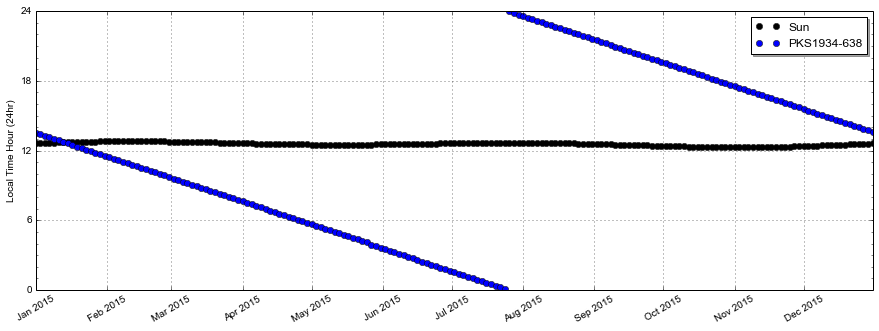

In [1]:
import ephem        # package provides ephemeris info

%pylab inline
#ephem.day = 24*ephem.hour  # not sure why this is needed.

# tell ephem where the observer is located
kat= ephem.Observer()
kat.lat='-30:43:17.34'
kat.lon='21:24:38.46'
kat.elev=1038
kat.temp=24.
kat.pressure=892
kat.horizon='2:00:00'

# lets find the location of the Sun and CassA
Sun = ephem.Sun()
Sun.compute(kat)
PKS1934 = ephem.readdb('PKS1934-638,f|J, 19:39:25.0,-63:42:45,99.00,2000')
PKS1934.compute(kat)

print "The next transit (local) time for the Sun is ", ephem.localtime(kat.next_transit(Sun))
print "The next transit (local) time for PKS1934 is ", ephem.localtime(kat.next_transit(PKS1934))

# Let's make a plot of the sun and PKS1934 transit times for all of 2015
#  Note: these transit times will be in LOCAL time, which means the local time of the computer running the code.
startDate = ephem.Date('2015/1/1 02:00:00.0')   # midnight at KAT
endDate = ephem.Date(startDate+90)
times = []
sunTransits = []
PTransits = []

for day in range(0,365,2):
    kat.date= ephem.Date(startDate+day)
    t=kat.date.datetime()
    times.append(t.date())
    
    sunTranTime = ephem.localtime(kat.next_transit(Sun))
    sunTranHr = sunTranTime.hour + sunTranTime.minute/60. + sunTranTime.second/3600.
    sunTransits.append(sunTranHr)

    PTranTime = ephem.localtime(kat.next_transit(PKS1934))
    PTranHr = PTranTime.hour + PTranTime.minute/60. + PTranTime.second/3600.
    PTransits.append(PTranHr)

fig = pylab.figure(figsize=(15,5))
ax = fig.add_subplot(111) # subplot, but with only one plot. This is just to get an axis returned.
ax.plot_date(times, sunTransits, 'o',label='Sun',linewidth=1.0,color='black') 
ax.plot_date(times, PTransits, 'o',label='PKS1934-638',linewidth=1.5,color='blue') 
 

ax.set_xlim([times[0],times[len(times)-1]])

#import matplotlib.dates as mdates
#ax.xaxis.set_major_locator(mdates.MonthLocator())
#ax.xaxis.set_minor_locator(mdates.WeekdayLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

ax.set_ylim(0,24)
import matplotlib.ticker as ticker
ax.yaxis.set_major_locator(ticker.MultipleLocator(6))   # put a label every 6 hours.
ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))   # and a minor marker every hour.

# let's rotate all the x-axis labels, so they fit below the axis.
labels = ax.get_xticklabels()
for label in labels:
  label.set_rotation(30)

pylab.ylabel('Local Time Hour (24hr)' )
pylab.legend(loc='upper right',shadow=True)
pylab.grid()

pylab.show()

In [2]:
kat.date

42367.583333333336

In [3]:
ephem.Date('2014/1/1 08:00:00.0')

41638.833333333336

Here are some other useful objects:

In [4]:
"""
Sun = ephem.Sun()
Sun.compute(kat)


Crab = ephem.readdb('Crab,f|R, 05:34:31.9, 22:00:52,8.40,2000')
Crab.compute(kat)

Cygnus_A = ephem.readdb('Cygnus-A,f|J, 19:59:28.3, 40:44:02.1,99.00,2000')
Cygnus_A.compute(kat)

M_87 = ephem.readdb('M-87,f|H|J, 12:30:49.2, 12:23:28.0,99.00,2000')
M_87.compute(kat)


"""

"\nSun = ephem.Sun()\nSun.compute(kat)\n\n\nCrab = ephem.readdb('Crab,f|R, 05:34:31.9, 22:00:52,8.40,2000')\nCrab.compute(kat)\n\nCygnus_A = ephem.readdb('Cygnus-A,f|J, 19:59:28.3, 40:44:02.1,99.00,2000')\nCygnus_A.compute(kat)\n\nM_87 = ephem.readdb('M-87,f|H|J, 12:30:49.2, 12:23:28.0,99.00,2000')\nM_87.compute(kat)\n\n\n"

In [5]:
# here's a basic UTC to LST converter from Kiyo. Much better to use the astropy routines instead!
def get_LST(utc): # from an almanac
  # first get gmt in useful format for converting to lst
  utcf = (utc - 1356912000)/(24.*60.*60) 
  utcd = int((utc - 1356912000)/(24.*60.*60))
  utct = (utcf - utcd)*24.
  
  # get gmst in hours
  gmst = 6.6547660 + 0.0657098245*utcd + 1.00273791*utct
 
  # get local sidereal time in hours for longitude: lon = '-119:37:26.4'
  longt = -119 - (37.2/60.) # degrees
  longt = longt*(24/360.) # hours
  lst = gmst+longt
  if lst > 24.:
     lst = lst - 24.
  return lst 


<H1>Astropy Units and Constants</H1>

In [6]:
from astropy import units   # see http://docs.astropy.org/en/stable/units/index.html
wavelength = 0.21 * units.m
print wavelength.to(units.cm)
print [1., 2., 3.] * units.m
print wavelength.to(units.cm)**2


21.0 cm
[ 1.  2.  3.] m
441.0 cm2


In [7]:
from astropy import constants    # see http://docs.astropy.org/en/stable/constants/index.html

print "the speed of light ", constants.c
print "\n   0.9 times the speed of light is", 0.9 * constants.c

print constants.hbar


the speed of light    Name   = Speed of light in vacuum
  Value  = 299792458.0
  Uncertainty  = 0.0
  Unit  = m / s
  Reference = CODATA 2010

   0.9 times the speed of light is 269813212.2 m / s
  Name   = Reduced Planck constant
  Value  = 1.05457172534e-34
  Uncertainty  = 4.61549334966e-42
  Unit  = J s
  Reference = CODATA 2010


<H3>Photon Noise - radiometer equation vs. shot noise</H3>
Photons are bosons that are subject Bose-Einstein statistics. The relevant quantity is $$\frac{1}{e^{h\nu/kT}} .$$
Below the frequency where $kT = h\nu$, the photons are coherent, and the radiometer equation applies,
$$ \sigma_T = \frac{T_{sys}}{\sqrt{ B t } } $$
where $\sigma_T$ is the uncertainty in the measurement of a sky temperature, $T_{sys}$ is the system temperature including both the receiver and the sky, $B$ is the bandwidth, and $t$ is the measurement time.


In the Rayleigh-Jeans limit at these "low" frequencies, the uncertainty equation for coherent detection is
$$   \Delta n \Delta phi \ge \frac{1}{2} .$$
Since coherent detection will involve applification of the input signal, increasing the number of photons $N$ while attempting to preserve the phase.  Noiseless amplification would violate the uncertainty principle, and so is not possible. To preserve this principle, the amplification must introduce quantum noise, $$ T_{noise}=h\nu/k_B $$
where $T_{noise}$ is the receiver noise temperature.



Above this frequency photon shot noise is the relevant thing and the noise goes as $\sqrt{\#_{photons}}$.

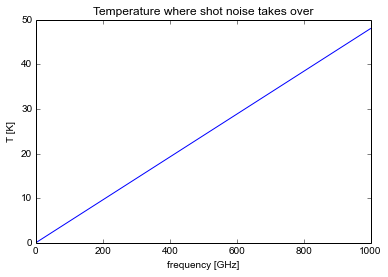

In [8]:
nu = 1e9 * linspace(1,1000,1000) # frequency in Hz.
T = nu * constants.h / constants.k_B   # you can make array that include units...
plot(nu/1e9,T.value)   # the .value resolves the array into a basic numerical array value, so it can be plotted 
                       #  or operated on by other functions that want simple numbers as input.
xlabel("frequency [GHz]")
ylabel("T [K]")
title("Temperature where shot noise takes over")

At 3K, the cross over happens at 50 GHz (400 GHz at 20K). In this region (where CMB experiments typically operate), a fudge factor referred to as "the bunching factor" is typically applied.

[from Kevin M. and Tijmen deH.'s explanations]

<H2> Astropy.Cosmology</H2>

In [9]:
from astropy.cosmology import WMAP9 as cosmo    #other cosmologies of interest include Planck13
print cosmo.H(0)
print "critical density at z=0: ", cosmo.critical_density(0)
print cosmo


69.32 km / (Mpc s)
critical density at z=0:  9.02654646573e-30 g / cm3
FlatLambdaCDM(name="WMAP9", H0=69.3 km / (Mpc s), Om0=0.286, Tcmb0=2.725 K, Neff=3.04, m_nu=[ 0.  0.  0.] eV, Ob0=0.0463)


In [10]:
# its easy to create your own cosmologies:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
print cosmo

redshifts = [0, 0.8, 2.5]
print "redshift list: ", redshifts
print "comoving distance: ", cosmo.comoving_distance(redshifts)  # prints the comoving distance at z=redshifts
print "age of the universe: ", cosmo.age(redshifts)
print "lookback time in Gyr: ", cosmo.lookback_time(redshifts)  
print "dark energy fraction: ", cosmo.Ode(redshifts) 
print "matter fraction: ", cosmo.Om(redshifts)

FlatLambdaCDM(H0=70 km / (Mpc s), Om0=0.3, Tcmb0=2.725 K, Neff=3.04, m_nu=[ 0.  0.  0.] eV, Ob0=None)
redshift list:  [0, 0.8, 2.5]
comoving distance:  [    0.          2787.46329904  5826.4159532 ] Mpc
age of the universe:  [ 13.46170166   6.6345977    2.56987757] Gyr
lookback time in Gyr:  [  0.           6.82710396  10.89182409] Gyr
dark energy fraction:  [ 0.69991476  0.28563174  0.05155831]
matter fraction:  [ 0.3         0.71400307  0.94749938]


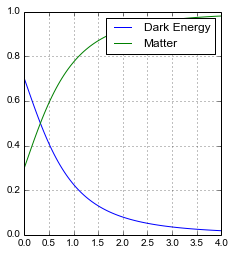

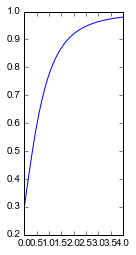

In [11]:
redshifts = linspace(0,4,100)
age = cosmo.age(redshifts)

fig = figure( figsize=(12,4) )
subplot(1,3,1)
plot(redshifts, cosmo.Ode(redshifts), label="Dark Energy")
plot(redshifts, cosmo.Om(redshifts), label="Matter")
#xlabel('redshift (z)')
#ylabel('Energy Density')
#title( str(cosmo) )
legend()
grid(True)
show()

subplot(1,3,2)
#plot(redshifts, 60*100e3/cosmo.kpc_comoving_per_arcmin(redshifts), label="Comoving 100 Mpc in degrees")
plot(redshifts, cosmo.Om(redshifts), label="Matter")
#plot(redshifts, cosmo.comoving_transverse_distance(redshifts), label="Comoving 100 Mpc in degrees")
#plot(redshifts, cosmo.kpc_proper_per_arcmin(redshifts), label="Proper 100 Mpc in degrees")

#Tcmb0
#Tnu0


In [12]:
help(cosmo)


Help on FlatLambdaCDM in module astropy.cosmology.core object:

class FlatLambdaCDM(LambdaCDM)
 |  FLRW cosmology with a cosmological constant and no curvature.
 |  
 |  This has no additional attributes beyond those of FLRW.
 |  
 |  Parameters
 |  ----------
 |  H0 : float or `~astropy.units.Quantity`
 |      Hubble constant at z = 0.  If a float, must be in [km/sec/Mpc]
 |  
 |  Om0 : float
 |      Omega matter: density of non-relativistic matter in units of the
 |      critical density at z=0.
 |  
 |  Tcmb0 : float or scalar `~astropy.units.Quantity`, optional
 |      Temperature of the CMB z=0. If a float, must be in [K].
 |      Default: 2.725 [K]. Setting this to zero will turn off both photons
 |      and neutrinos (even massive ones).
 |  
 |  Neff : float, optional
 |      Effective number of Neutrino species. Default 3.04.
 |  
 |  m_nu : `~astropy.units.Quantity`, optional
 |      Mass of each neutrino species. If this is a scalar Quantity, then all
 |      neutrino specie